In [ ]:
# Barking, Growling, Howling, Whinning, None
# UpHead, DownHead
# UpEar, DownEar
# Open, Close, Teeth
# Sit, Stand, Lay, Front, Back
# UpTail, DownTail, MidTail

In [9]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"

In [10]:
import csv
import pandas as pd

f = open('emotion.csv', 'r')
data = csv.reader(f)
header = next(data)

features = []

for row in data:
    feat = [0, 0, 0, 0, 0, 0]
    # 음성
    if row[0] == 'Barking':
        feat[0] = 1
    elif row[0] == 'Growling':
        feat[0] = 2
    elif row[0] == 'Howling':
        feat[0] = 3
    elif row[0] == 'Whinning':
        feat[0] = 4
    
    # 머리
    if row[1] == 'UpHead':
        feat[1] = 1
    elif row[1] == 'DownHead':
        feat[1] = 2
        
    # 귀
    if row[2] == 'UpEar':
        feat[2] = 1
    elif row[2] == 'DownEar':
        feat[2] = 2
        
    # 입
    if row[3] == 'Open':
        feat[3] = 1
    elif row[3] == 'Close':
        feat[3] = 2
    elif row[3] == 'Teeth':
        feat[3] = 3
    
    # 자세
    if row[4] == 'Sit':
        feat[4] = 1
    elif row[4] == 'Stand':
        feat[4] = 2
    elif row[4] == 'Lay':
        feat[4] = 3
    elif row[4] == 'Front':
        feat[4] = 4
    elif row[4] == 'Back':
        feat[4] = 5
        
    # 꼬리
    if row[5] == 'UpTail':
        feat[5] = 1
    elif row[5] == 'DownTail':
        feat[5] = 2
    elif row[5] == 'MidTail':
        feat[5] = 3
        
    class_label = row[6]
        
    features.append([feat, class_label])
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

In [11]:
featuresdf

,feature,class_label
0,"[1, 1, 1, 1, 1, 1]",관심
1,"[1, 1, 1, 1, 1, 2]",경계
2,"[1, 1, 1, 1, 1, 3]",관심
3,"[1, 1, 1, 1, 2, 1]",관심
4,"[1, 1, 1, 1, 2, 2]",경계
...,...,...
895,"[0, 2, 2, 3, 4, 2]",슬픔
896,"[0, 2, 2, 3, 4, 3]",슬픔
897,"[0, 2, 2, 3, 5, 1]",공포
898,"[0, 2, 2, 3, 5, 2]",공포


In [12]:
# class_label 값을 원-핫 인코딩 후 훈련 데이터와 검증 데이터 분리
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

le = LabelEncoder()
yy = to_categorical(le.fit_transform(y))

x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

In [13]:
import tensorflow as tf

n_columns = 6
n_row = 1
n_channels = 1
n_classes = 9

# input shape 조정
# cpu를 사용해서 수행한다
with tf.device('/cpu:0'):
    x_train = tf.reshape(x_train, [-1, n_row, n_columns, n_channels])
    x_test = tf.reshape(x_test, [-1, n_row, n_columns, n_channels])

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense, Dropout, Flatten

MLP = Sequential()
MLP.add(InputLayer(input_shape=(1, 6))) # input layer
MLP.add(Dense(256, activation='relu')) # hidden layer 1
MLP.add(Dense(256, activation='relu')) # hidden layer 2
MLP.add(Dense(256, activation='relu'))
MLP.add(Flatten())
MLP.add(Dense(9, activation='softmax')) # output layer

# summary
MLP.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1, 256)            1792      
                                                                 
 dense_5 (Dense)             (None, 1, 256)            65792     
                                                                 
 dense_6 (Dense)             (None, 1, 128)            32896     
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 101,641
Trainable params: 101,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
MLP.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
history = MLP.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/100
72/72 [==============================] - 1s 7ms/step - loss: 1.6747 - accuracy: 0.3931 - val_loss: 1.4276 - val_accuracy: 0.5056
Epoch 2/100
72/72 [==============================] - 0s 5ms/step - loss: 1.3924 - accuracy: 0.5000 - val_loss: 1.2387 - val_accuracy: 0.6444
Epoch 3/100
72/72 [==============================] - 0s 5ms/step - loss: 1.2162 - accuracy: 0.5556 - val_loss: 1.0659 - val_accuracy: 0.4944
Epoch 4/100
72/72 [==============================] - 0s 4ms/step - loss: 1.0853 - accuracy: 0.5944 - val_loss: 0.8921 - val_accuracy: 0.6889
Epoch 5/100
72/72 [==============================] - 0s 3ms/step - loss: 1.0172 - accuracy: 0.6111 - val_loss: 0.8446 - val_accuracy: 0.7000
Epoch 6/100
72/72 [==============================] - 0s 3ms/step - loss: 0.9182 - accuracy: 0.6597 - val_loss: 0.7989 - val_accuracy: 0.7167
Epoch 7/100
72/72 [==============================] - 0s 3ms/step - loss: 0.8452 - accuracy: 0.6819 - val_loss: 0.8003 - val_accuracy: 0.7500
Epoch 8/100
7

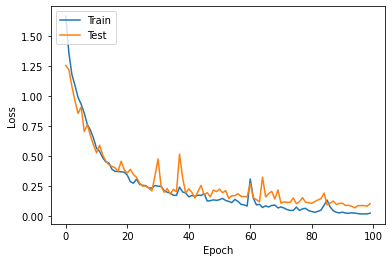

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
result = MLP.evaluate(x_test, y_test, batch_size=10)
result
#test loss, test acc

18/18 [==============================] - 0s 645us/step - loss: 0.0431 - accuracy: 0.9833


[0.043050505220890045, 0.9833333492279053]

In [10]:
classid = ['관심', '경계', '공포', '분리불안', '피로', '슬픔', '안정', '불안', '즐거움']

test = [0, 1, 1, 1, 3, 0]
test = np.array(test)
test = test.reshape(-1, 1, 6, 1)
prob = np.argmax(MLP.predict(test), axis=-1)
print(str(classid[int(prob)]))

1/1 [==============================] - 0s 81ms/step
안정
